In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
X_tst[:,:, 0] = X_tst[:,:, 0] * 4.0
X_tst[:,:, 1] = X_tst[:,:, 1] * 3.0

print(X_tst.shape)

cfg = additive_1x2_uniform_04_03_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_04_03_generator.Generator
clip_op_lambda = (lambda x: clip_op_04_03(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_04_03/model-400000


2019-01-22 00:22:49,106:INFO:Restoring parameters from experiments/additive_1x2_uniform_04_03/model-400000
2019-01-22 00:22:53,000:INFO:TEST BATCH-0: t = 3.8522, Revenue: 0.852211, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,011:INFO:TEST BATCH-1: t = 3.8581, Revenue: 0.854519, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,020:INFO:TEST BATCH-2: t = 3.8635, Revenue: 0.856926, Regret: 0.000003, IRP: 0.000000
2019-01-22 00:22:53,029:INFO:TEST BATCH-3: t = 3.8687, Revenue: 0.859601, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,038:INFO:TEST BATCH-4: t = 3.8738, Revenue: 0.862652, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,047:INFO:TEST BATCH-5: t = 3.8790, Revenue: 0.866125, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,055:INFO:TEST BATCH-6: t = 3.8839, Revenue: 0.870017, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,063:INFO:TEST BATCH-7: t = 3.8884, Revenue: 0.874300, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:53,071:INFO:TEST BATCH-8: t 

2019-01-22 00:22:53,598:INFO:TEST BATCH-76: t = 4.2131, Revenue: 1.589461, Regret: 0.000007, IRP: 0.000000
2019-01-22 00:22:53,606:INFO:TEST BATCH-77: t = 4.2175, Revenue: 1.600861, Regret: 0.000001, IRP: 0.000000
2019-01-22 00:22:53,614:INFO:TEST BATCH-78: t = 4.2218, Revenue: 1.612265, Regret: 0.000006, IRP: 0.000000
2019-01-22 00:22:53,621:INFO:TEST BATCH-79: t = 4.2260, Revenue: 1.623673, Regret: 0.000005, IRP: 0.000000
2019-01-22 00:22:53,629:INFO:TEST BATCH-80: t = 4.2304, Revenue: 1.635085, Regret: 0.000003, IRP: 0.000000
2019-01-22 00:22:53,637:INFO:TEST BATCH-81: t = 4.2348, Revenue: 1.646502, Regret: 0.000003, IRP: 0.000000
2019-01-22 00:22:53,644:INFO:TEST BATCH-82: t = 4.2391, Revenue: 1.657922, Regret: 0.000016, IRP: 0.000000
2019-01-22 00:22:53,652:INFO:TEST BATCH-83: t = 4.2435, Revenue: 1.669348, Regret: 0.000008, IRP: 0.000000
2019-01-22 00:22:53,659:INFO:TEST BATCH-84: t = 4.2478, Revenue: 1.680779, Regret: 0.000008, IRP: 0.000000
2019-01-22 00:22:53,667:INFO:TEST BAT

2019-01-22 00:22:54,083:INFO:TEST BATCH-153: t = 4.5154, Revenue: 2.735820, Regret: 0.000002, IRP: 0.000000
2019-01-22 00:22:54,088:INFO:TEST BATCH-154: t = 4.5184, Revenue: 2.737754, Regret: 0.000003, IRP: 0.000000
2019-01-22 00:22:54,093:INFO:TEST BATCH-155: t = 4.5213, Revenue: 2.739534, Regret: 0.000004, IRP: 0.000000
2019-01-22 00:22:54,098:INFO:TEST BATCH-156: t = 4.5244, Revenue: 2.741180, Regret: 0.000005, IRP: 0.000000
2019-01-22 00:22:54,103:INFO:TEST BATCH-157: t = 4.5282, Revenue: 2.742708, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:54,109:INFO:TEST BATCH-158: t = 4.5320, Revenue: 2.744133, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:54,114:INFO:TEST BATCH-159: t = 4.5354, Revenue: 2.745465, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:54,119:INFO:TEST BATCH-160: t = 4.5383, Revenue: 2.746714, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:54,124:INFO:TEST BATCH-161: t = 4.5415, Revenue: 2.747889, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:22:54,129:INFO

DEBUG: xsum = 141403.500000


In [5]:
alloc = np.load(cfg.dir_name + "/alloc_tst_400000.npy").reshape(D,D,2)
pay = np.load(cfg.dir_name + "/pay_tst_400000.npy").reshape(D,D,1)

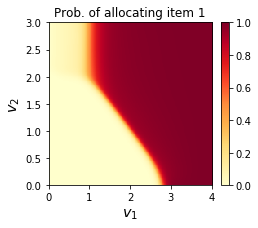

In [6]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

img = ax.imshow(alloc[::-1, :, 0], extent=[0,4,0,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4/3)

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

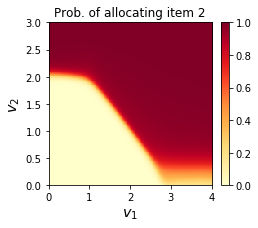

In [7]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

img = ax.imshow(alloc[::-1, :, 1], extent=[0,4,0,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4/3)

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)